## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)


import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Functions

In [2]:
def plotFor(test,forecasts):
    # Plotting the true values and the predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(test, label='True Values', marker='o')
    plt.plot(forecasts, label='Predicted Values', marker='x')
    plt.title('Random Forest Model Forecast for the Last 24 Observations')
    plt.xlabel('Time')
    plt.ylabel('EUNG Price')
    plt.legend()
    plt.show()

def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

## Main

In [3]:
df = pd.read_excel("Renamed Columns Stationary Data/EUNG.xlsx") 
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,EUNG,EUNG_LAG,Equity Market Volatility,Economic Policy Uncertainty Europe,NY Business Conditions,3 Month Treasury Bill,Infectious Disease Tracker,Nickel,COV19,RUWAR
DATE,,,,,,,,,,
2001-10-01,-0.154151,0.000000,22.46,141.35,-4.5,-0.72,0.39,-0.088497,0,0
2001-11-01,0.000000,-0.154151,-13.09,-10.39,-2.2,-0.48,-0.06,-0.045894,0,0
2001-12-01,-0.006192,0.000000,-2.94,-39.39,-6.8,-0.29,0.09,0.060355,0,0
2002-01-01,-0.143340,-0.006192,-2.04,-53.76,11.7,-0.18,-0.39,0.035324,0,0
2002-02-01,0.000000,-0.143340,4.29,-5.87,11.2,-0.04,0.29,0.131247,0,0
...,...,...,...,...,...,...,...,...,...,...
2023-06-01,0.031592,-0.316354,2.93,21.28,-42.6,0.22,2.32,-0.071308,1,1
2023-07-01,-0.068368,0.031592,-5.14,-18.30,38.4,0.02,-2.45,-0.041580,1,1
2023-08-01,0.109307,-0.068368,-0.72,16.36,-5.5,0.09,-0.81,-0.006711,1,1


In [4]:
import statsmodels.api as sm


y = df['EUNG']
X = df[["EUNG_LAG","Equity Market Volatility","Economic Policy Uncertainty Europe","NY Business Conditions","3 Month Treasury Bill","Infectious Disease Tracker","Nickel","COV19","RUWAR"]]

# Add a constant term to the feature matrix (for intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   EUNG   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.990
Date:                Sat, 13 Jan 2024   Prob (F-statistic):             0.0409
Time:                        15:32:20   Log-Likelihood:                 157.67
No. Observations:                 265   AIC:                            -295.3
Df Residuals:                     255   BIC:                            -259.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  0.0014      0.009      0.154      0.878      -0.017       0.020
EUNG_LAG                               0.1302      0.063      2.080      0.039       0.007       0.253
Equity Market Volatility              -0.0004      0.001     -0.288      0.774      -0.003       0.002
Economic Policy Uncertainty Europe  8.039e-05      0.000      0.403      0.687      -0.000       0.000
NY Business Conditions                 0.0003      0.001      0.421      0.674      -0.001       0.002
3 Month Treasury Bill                  0.0611      0.051      1.199      0.232      -0.039       0.162
Infectious Disease Tracker            -0.0018      0.002     -0.741      0.460      -0.007       0.003
Nickel                                -0.1276      0.099     -1.286      0.200      -0.323       0.068
COV19                                  0.0684      0.029      2.332      0.021       0.011       0.126
RUWAR                                 -0.1128      0.044     -2.545      0.012      -0.200      -0.026
==============================================================================
Omnibus:                      107.932   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1366.313
Skew:                          -1.246   Prob(JB):                    2.04e-297
Kurtosis:                      13.841   Cond. No.                         528.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Droping columns with P > 0.1

In [5]:
selected_columns = ["EUNG","EUNG_LAG","COV19","RUWAR"]
pruned_df = df[selected_columns]

pruned_df = pruned_df.set_index(df.index)
pruned_df

,EUNG,EUNG_LAG,COV19,RUWAR
DATE,,,,
2001-10-01,-0.154151,0.000000,0,0
2001-11-01,0.000000,-0.154151,0,0
2001-12-01,-0.006192,0.000000,0,0
2002-01-01,-0.143340,-0.006192,0,0
2002-02-01,0.000000,-0.143340,0,0
...,...,...,...,...
2023-06-01,0.031592,-0.316354,1,1
2023-07-01,-0.068368,0.031592,1,1
2023-08-01,0.109307,-0.068368,1,1


## Tree

In [6]:
# Splitting the data into train and test sets
train, test = train_test_split(pruned_df, test_size=0.09, shuffle=False)

# Defining features and target
features = ["EUNG_LAG","COV19","RUWAR"]
target = "EUNG"

In [7]:
# RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Hyperparameters range for Randomized Search
param_distributions = {
    'n_estimators': [100, 200, 400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10,30,50],
    'min_samples_split': [2, 6],
    'min_samples_leaf': [1, 2, 6],
    'bootstrap': [True, False]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions, n_iter=500, cv=5, random_state=42, n_jobs=-1)

# Fitting the model
random_search.fit(train[features], train[target])

# Best model from random search
best_model = random_search.best_estimator_

test['PREDICTED_EUNG'] = best_model.predict(test[features])

# Outputting the best parameters
best_params = random_search.best_params_
best_params

C:\Users\FURIOUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 324 is smaller than n_iter=500. Running 324 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

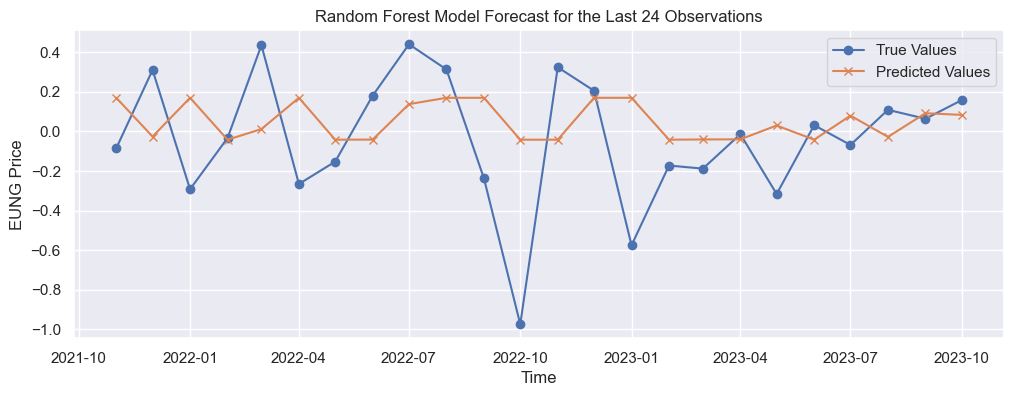

In [8]:
plotFor(test['EUNG'],test['PREDICTED_EUNG'])

In [9]:
y_test = test['EUNG']
predictions = test['PREDICTED_EUNG']

In [10]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.2626
MAPE: 116.9904 %
MSE: 0.1199
RMSE: 0.3463


## Saving Predictions

In [11]:
df = pd.DataFrame({'EUNG M RF': predictions, 'Actual': y_test})
df.to_excel("EUNG_M_RF_forecast.xlsx", index=True)
df

,EUNG M RF,Actual
DATE,,
2021-11-01,0.170198,-0.085031
2021-12-01,-0.025946,0.310788
2022-01-01,0.170198,-0.292332
2022-02-01,-0.041736,-0.033172
2022-03-01,0.011919,0.436124
2022-04-01,0.170198,-0.265797
2022-05-01,-0.041736,-0.152693
2022-06-01,-0.041161,0.181046
2022-07-01,0.138196,0.440986


In [12]:
# Open a file in write mode
with open('EUNG M RF Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')